In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from formula import *
import json_function as fjson

In [2]:
data_path = "E:/_TUGAS/_ITBOneDrive/OneDrive - Institut Teknologi Bandung/_Kuliah/_sem7/7_kerja praktek/data/repetisi RC"
folder_name = ["465ohm variasi C/", "1003ohm variasi C/", "1468ohm variasi C/"]
folder_path = folder_name.copy()

i = 0
for f in folder_path:
    folder_path[i] = os.path.join(data_path, f)
    print(folder_path[i])
    i += 1

E:/_TUGAS/_ITBOneDrive/OneDrive - Institut Teknologi Bandung/_Kuliah/_sem7/7_kerja praktek/data/repetisi RC\465ohm variasi C/
E:/_TUGAS/_ITBOneDrive/OneDrive - Institut Teknologi Bandung/_Kuliah/_sem7/7_kerja praktek/data/repetisi RC\1003ohm variasi C/
E:/_TUGAS/_ITBOneDrive/OneDrive - Institut Teknologi Bandung/_Kuliah/_sem7/7_kerja praktek/data/repetisi RC\1468ohm variasi C/


In [3]:
index_dir = 1

# scan all files
path, dirs, files = next(os.walk(folder_path[index_dir]))

for file in files:
    print(file)

1003ohm (1).csv
1003ohm (2).csv
1003ohm (3).csv
1003ohm (4).csv
1003ohm (5).csv
1003ohm 10.57nF (1).csv
1003ohm 10.57nF (2).csv
1003ohm 10.57nF (3).csv
1003ohm 10.57nF (4).csv
1003ohm 10.57nF (5).csv
1003ohm 150pF (1).csv
1003ohm 150pF (2).csv
1003ohm 150pF (3).csv
1003ohm 150pF (4).csv
1003ohm 150pF (5).csv
1003ohm 180pF (1).csv
1003ohm 180pF (2).csv
1003ohm 180pF (3).csv
1003ohm 180pF (4).csv
1003ohm 180pF (5).csv
1003ohm 3.83nF (1).csv
1003ohm 3.83nF (2).csv
1003ohm 3.83nF (3).csv
1003ohm 3.83nF (4).csv
1003ohm 3.83nF (5).csv
1003ohm 5.53nF (1).csv
1003ohm 5.53nF (2).csv
1003ohm 5.53nF (3).csv
1003ohm 5.53nF (4).csv
1003ohm 5.53nF (5).csv
1003ohm 90pF (1).csv
1003ohm 90pF (2).csv
1003ohm 90pF (3).csv
1003ohm 90pF (4).csv
1003ohm 90pF (5).csv


In [4]:
# append datasets to the list
dfs = {}
for fn in files:
    path = folder_path[index_dir] + fn
    temp_df = pd.read_csv(path)
    dfs[fn[:-4]] = temp_df

dfs_list = list(dfs.values())

print( dfs_list[0].head() )
# print(dfs)

   Frequency    Impedance     Phase  Real  Imaginary   Magnitude  Unnamed: 6
0      20000  1001.987975 -0.014035   227       -936  963.132909         NaN
1      21000   999.212650  0.128615   240       -936  966.279463         NaN
2      22000  1004.272040 -0.041891   250       -933  965.913557         NaN
3      23000  1001.718865  0.040882   264       -930  966.745054         NaN
4      24000  1001.706296  0.040061   275       -924  964.054459         NaN


In [5]:
# delete column contains NaN
for df in dfs_list:
    # get column name
    column_list = []
    for col in df.columns:
        column_list.append(col)
    
    # delete column after "Magnitude"
    # "Magnitude" in index 5
    for i in range(len(column_list)):
        if i > 5: del df[column_list[i]]

print( dfs_list[0].head() )
# print(dfs)

   Frequency    Impedance     Phase  Real  Imaginary   Magnitude
0      20000  1001.987975 -0.014035   227       -936  963.132909
1      21000   999.212650  0.128615   240       -936  966.279463
2      22000  1004.272040 -0.041891   250       -933  965.913557
3      23000  1001.718865  0.040882   264       -930  966.745054
4      24000  1001.706296  0.040061   275       -924  964.054459


In [6]:
# extract the RC variation
variation_str = []
for f in files:
    if f[:-8] not in variation_str:
        variation_str.append( f[:-8] )

variation_data = variation_str.copy()
print(variation_data)

['1003ohm', '1003ohm 10.57nF', '1003ohm 150pF', '1003ohm 180pF', '1003ohm 3.83nF', '1003ohm 5.53nF', '1003ohm 90pF']


In [7]:
# remove units
for i in range(len(variation_data)):
    want_to_replaced = ["ohm", "F"]
    for str in want_to_replaced:
        if str in variation_data[i]:
            variation_data[i] = variation_data[i].replace(str, "")

print(variation_data)

['1003', '1003 10.57n', '1003 150p', '1003 180p', '1003 3.83n', '1003 5.53n', '1003 90p']


In [8]:
# convert "p" and "n" into 1e(-N)
convert_unit = [["k", "e3"], ["u", "e-6"], ["n", "e-9"], ["p", "e-12"]]
for i in range(len(variation_data)):
    for unit_str, unit_val in convert_unit:
        if unit_str in variation_data[i]:
            mystr = variation_data[i]
            variation_data[i] = mystr.replace(unit_str, unit_val)

print(variation_data)

['1003', '1003 10.57e-9', '1003 150e-12', '1003 180e-12', '1003 3.83e-9', '1003 5.53e-9', '1003 90e-12']


In [9]:
# split into [[R1, C1], [R2, C2], ...]
for i in range(len(variation_data)):
    mystr = variation_data[i]
    arr_split = mystr.split(" ")
    variation_data[i] = arr_split

print(variation_data)

[['1003'], ['1003', '10.57e-9'], ['1003', '150e-12'], ['1003', '180e-12'], ['1003', '3.83e-9'], ['1003', '5.53e-9'], ['1003', '90e-12']]


In [10]:
# convert as float
for i in range(len(variation_data)):
    if len(variation_data[i]) != 2:     # only R
        variation_data[i].append(0)     # add value of C = 0
    for j in range(len(variation_data[i])):
        variation_data[i][j] = float(variation_data[i][j])

print(variation_data)

[[1003.0, 0.0], [1003.0, 1.057e-08], [1003.0, 1.5e-10], [1003.0, 1.8e-10], [1003.0, 3.83e-09], [1003.0, 5.53e-09], [1003.0, 9e-11]]


In [11]:
fstart = 20e3
fend = 50e3

fmid = calculate_fmid(fstart, fend)
print("fmid =", fmid)

# theoritic
arr_z = []
arr_phase = []
for i in range(len(variation_data)):
    r = variation_data[i][0]
    c = variation_data[i][1]
    xc = calculate_xc(fmid, c)
    z = calculate_z(r, xc)
    phase = calculate_phase(fmid, r, c)

    arr_z.append(z)
    arr_phase.append(phase)
    
print("arr_z =", arr_z)

fmid = 35000.0
arr_z = [1003.0000000000001, 395.3723892273706, 1002.451477090049, 1002.2104119420248, 766.1923200527444, 635.9049193667619, 1002.8024280386211]


In [12]:
# calculate error Z
iteration = len(dfs) // len(variation_data)

i = 0
for df in dfs_list:
    df["%Z"] = calculate_error(arr_z[i//iteration], df["Impedance"])
    i += 1
    
print( dfs_list[0].head() )

   Frequency    Impedance     Phase  Real  Imaginary   Magnitude        %Z
0      20000  1001.987975 -0.014035   227       -936  963.132909  0.100900
1      21000   999.212650  0.128615   240       -936  966.279463  0.377602
2      22000  1004.272040 -0.041891   250       -933  965.913557  0.126824
3      23000  1001.718865  0.040882   264       -930  966.745054  0.127730
4      24000  1001.706296  0.040061   275       -924  964.054459  0.128983


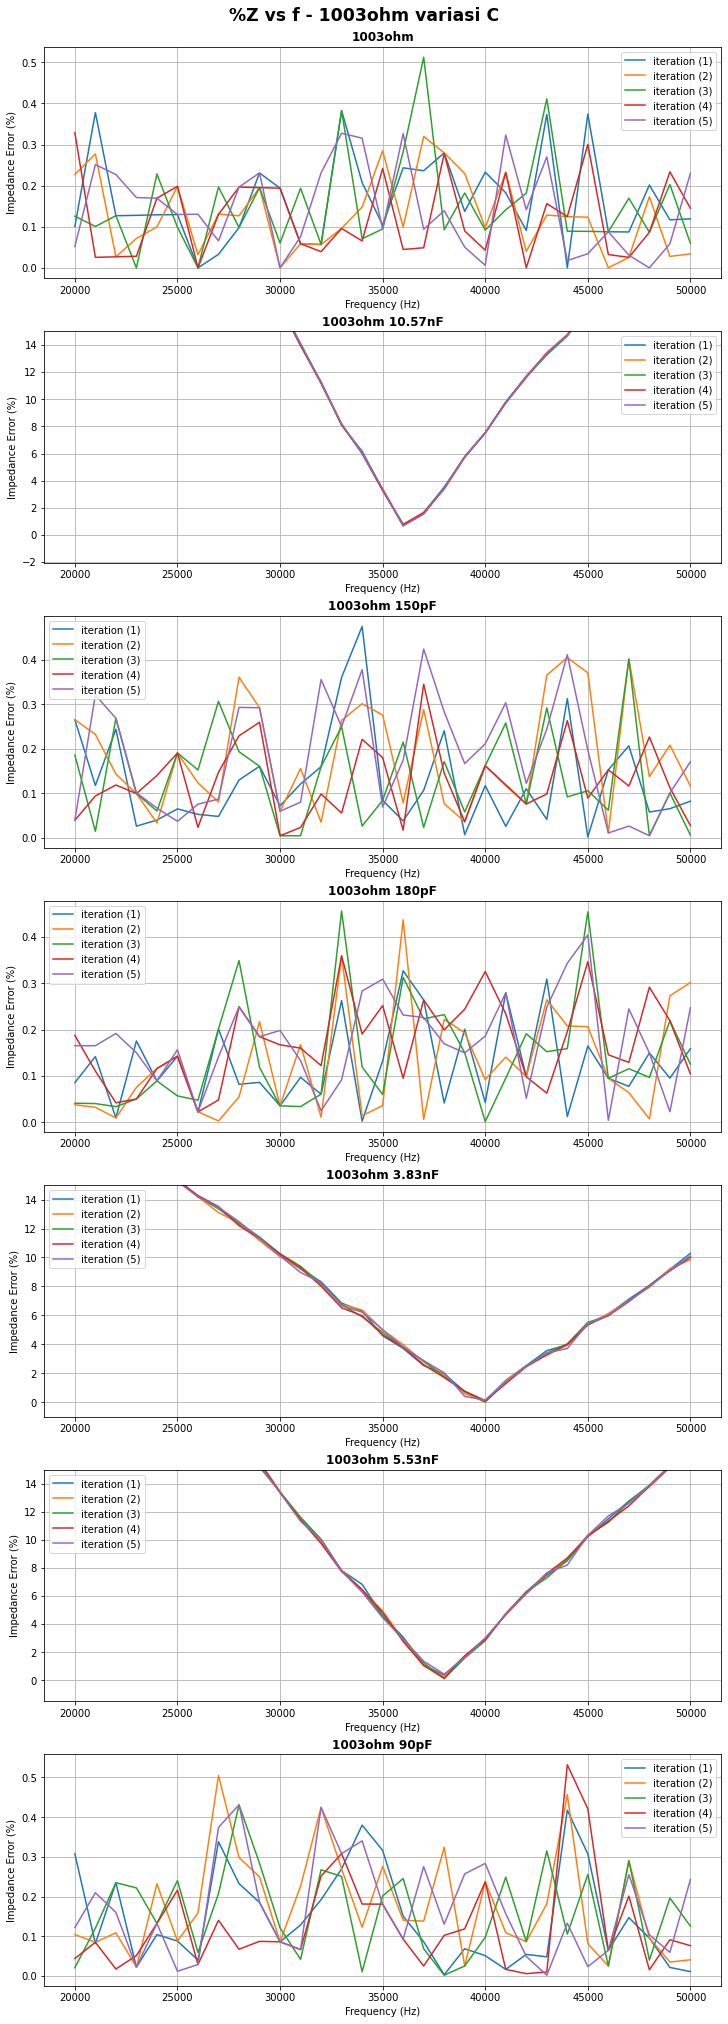

In [13]:
# plot %Z vs f

# compare data for each itearation
fig, axs = plt.subplots(nrows=len(variation_str), figsize=(10,4*len(variation_str)), constrained_layout=True)

count = 1   # to multiply the second loop (iteration)
for ax in axs:
    for i in range(iteration*(count-1), iteration*count):
        # print(i//iteration, arr_title[i//iteration])
        label_idx = (i+1) - iteration*(count-1)
        dfs_list[i].plot(x="Frequency", y="%Z", label="iteration (%s)" %label_idx, ax=ax)

        if i == iteration*count - 1:
            ax.set_title(variation_str[i//iteration], weight="bold")
    # print()
    count += 1

    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Impedance Error (%)")
    ax.grid(True)

    # limit the ylim if bigger than certain value
    limit_y = 15
    if ax.get_ylim()[1] > limit_y:
        ax.set_ylim(ax.get_ylim()[0], limit_y)

# add figure title
length = len( folder_path[index_dir] )-1
suptitle_sufix = ""
for i in range( length, 0, -1):
    if folder_path[index_dir][i] == "\\":
        suptitle_sufix = folder_path[index_dir][i+1:length]
        break

suptitle_text = "%Z vs f - " + suptitle_sufix

fig.suptitle(suptitle_text, fontsize="xx-large", weight="bold")

plt.show()

# save figure
save_path = os.path.join("../media/", suptitle_text + ".jpg")
fig.savefig(save_path)

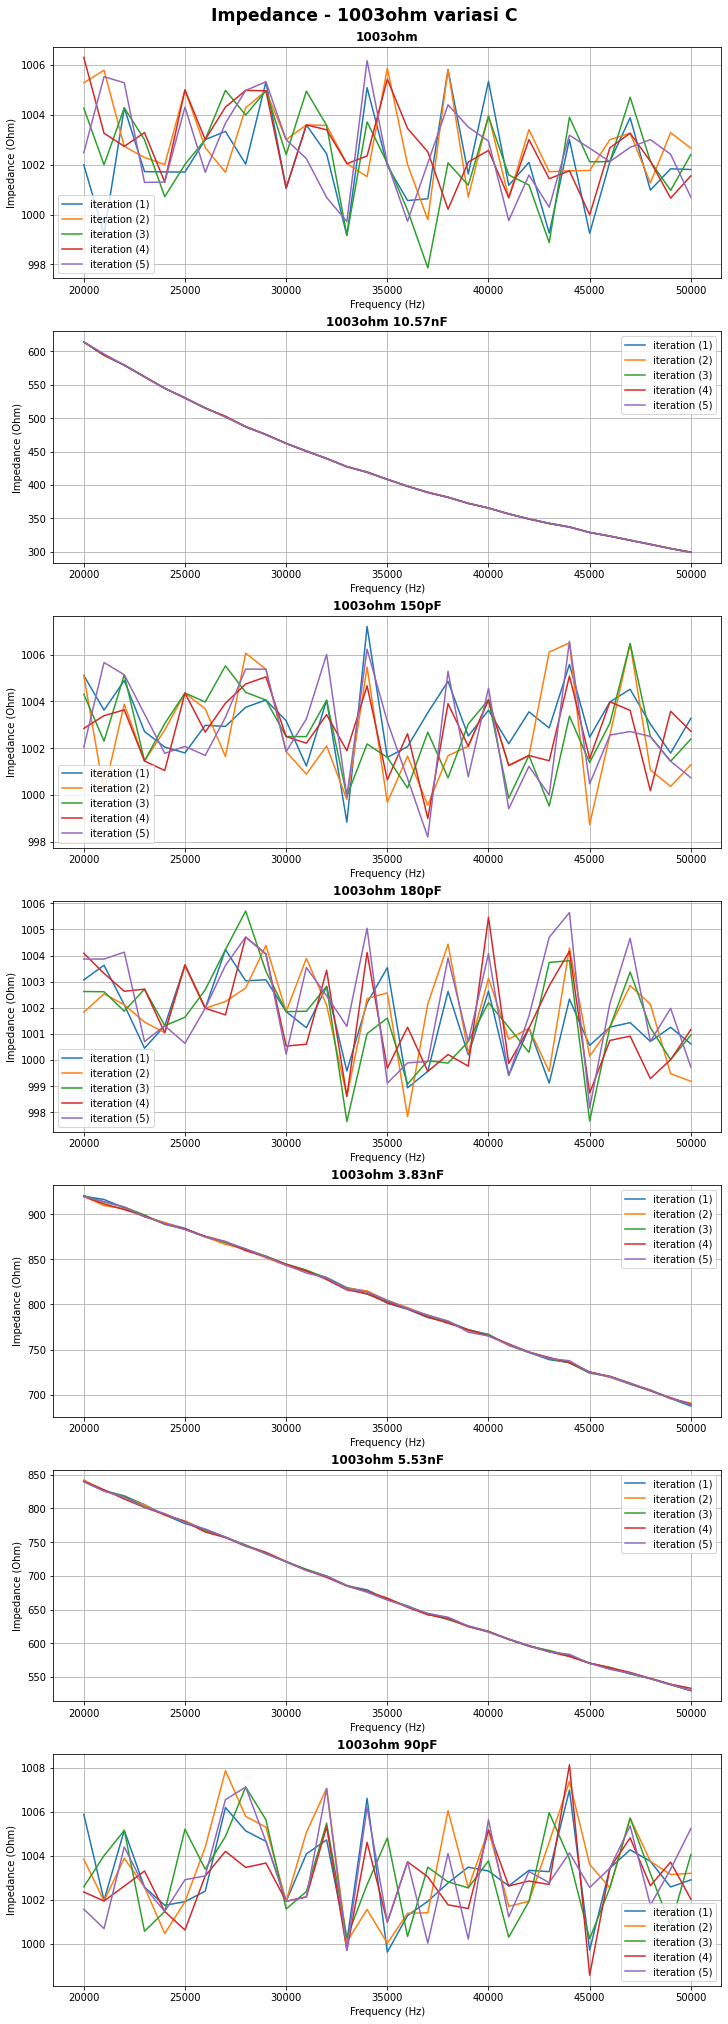

In [18]:
# plot impedance

# compare data for each itearation
fig, axs = plt.subplots(nrows=len(variation_str), figsize=(10,4*len(variation_str)), constrained_layout=True)

count = 1   # to multiply the second loop (iteration)
for ax in axs:
    for i in range(iteration*(count-1), iteration*count):
        # print(i//iteration, arr_title[i//iteration])
        label_idx = (i+1) - iteration*(count-1)
        dfs_list[i].plot(x="Frequency", y="Impedance", label="iteration (%s)" %label_idx, ax=ax)

        if i == iteration*count - 1:
            ax.set_title(variation_str[i//iteration], weight="bold")
    # print()
    count += 1

    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Impedance (Ohm)")
    ax.grid(True)

# add figure title
length = len( folder_path[index_dir] )-1
suptitle_sufix = ""
for i in range( length, 0, -1):
    if folder_path[index_dir][i] == "\\":
        suptitle_sufix = folder_path[index_dir][i+1:length]
        break

suptitle_text = "Impedance - " + suptitle_sufix

fig.suptitle(suptitle_text, fontsize="xx-large", weight="bold")

plt.show()

# save figure
save_path = os.path.join("../media/", suptitle_text + ".jpg")
fig.savefig(save_path)

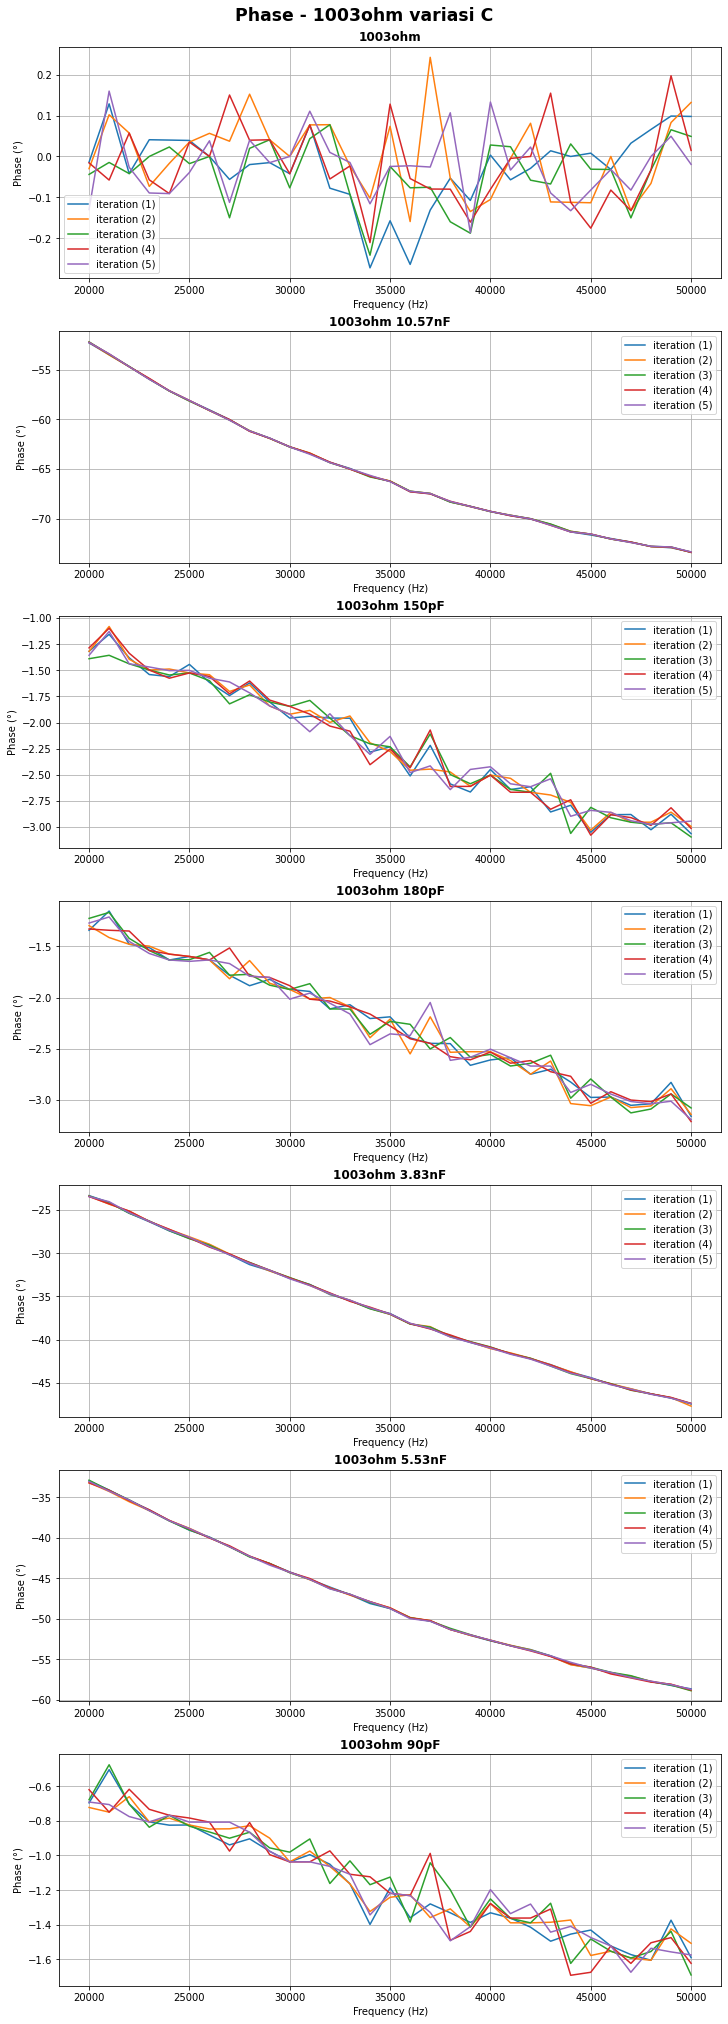

In [19]:
# plot phase

# compare data for each itearation
fig, axs = plt.subplots(nrows=len(variation_str), figsize=(10,4*len(variation_str)), constrained_layout=True)

count = 1   # to multiply the second loop (iteration)
for ax in axs:
    for i in range(iteration*(count-1), iteration*count):
        # print(i//iteration, arr_title[i//iteration])
        label_idx = (i+1) - iteration*(count-1)
        dfs_list[i].plot(x="Frequency", y="Phase", label="iteration (%s)" %label_idx, ax=ax)

        if i == iteration*count - 1:
            ax.set_title(variation_str[i//iteration], weight="bold")
    # print()
    count += 1

    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Phase (°)")
    ax.grid(True)

# add figure title
length = len( folder_path[index_dir] )-1
suptitle_sufix = ""
for i in range( length, 0, -1):
    if folder_path[index_dir][i] == "\\":
        suptitle_sufix = folder_path[index_dir][i+1:length]
        break

suptitle_text = "Phase - " + suptitle_sufix

fig.suptitle(suptitle_text, fontsize="xx-large", weight="bold")

plt.show()

# save figure
save_path = os.path.join("../media/", suptitle_text + ".jpg")
fig.savefig(save_path)

In [15]:
# save important information to json file

file_path="tmp/variation_rc.json"
variation_rc_obj = {}
for i in range(len(variation_data)):
    variation_rc_obj[variation_str[i]] = {}
    
    variation_rc_obj[variation_str[i]]["r"] = variation_data[i][0]
    variation_rc_obj[variation_str[i]]["c"] = variation_data[i][1]
    variation_rc_obj[variation_str[i]]["z_ref"] = arr_z[i]
    variation_rc_obj[variation_str[i]]["phase_ref"] = arr_phase[i]

fjson.write_obj_to_filejson(file_path, obj=variation_rc_obj)

print("Writing", file_path, "... Done")

Writing tmp/variation_rc.json ... Done


In [16]:
# save important information to json file

file_path = "tmp/overview.json"
overview_obj = fjson.read_filejson(file_path)

fjson.write_keyvalue(file_path, "num_variation", len(files)//iteration)
fjson.write_keyvalue(file_path, "num_iteration", iteration)
fjson.write_keyvalue(file_path, "folder_path", folder_name)
fjson.write_keyvalue(file_path, "variation", variation_str)

print("Writing", file_path, "... Done")

Writing tmp/overview.json ... Done
